In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from explore_data import get_data

data = get_data()
data["date"] = pd.to_datetime(data["date"])
data.set_index("id", inplace=True)

In [32]:
data.head()

,date,state,abbr,location,cases,death,season
id,,,,,,,
NJ0004673,2020-05-19,New Jersey,NJ,Burlington,4005,247,spring1
NJ0004674,2020-05-19,New Jersey,NJ,Union,15051,977,spring1
NM0004675,2020-05-19,New Mexico,NM,Luna,8,1,spring1
NY0004676,2020-05-19,New York,NY,Albany,1655,69,spring1
NY0004677,2020-05-19,New York,NY,Oswego,89,3,spring1


In [33]:
# find top 5 state with most death

top_5_states = data.groupby("state")["death"].max().sort_values(ascending=False).head(5)
top_5_states

state
California    30716
Arizona       15761
Illinois      14051
New York      12694
Texas         10667
Name: death, dtype: int64

In [34]:
# use only most cases and death for each state
most_cases = data.groupby("state")["cases"].max()
most_death = data.groupby("state")["death"].max()

# create new dataframe
new_data = pd.DataFrame({"cases": most_cases, "death": most_death})
new_data.head()

,cases,death
state,,
Alabama,181836,2214
Alaska,100540,501
Arizona,1246178,15761
Arkansas,101771,1118
California,2796560,30716


In [35]:
# find correlation between cases and death
new_data.corr()

,cases,death
cases,1.000000,0.973201
death,0.973201,1.000000


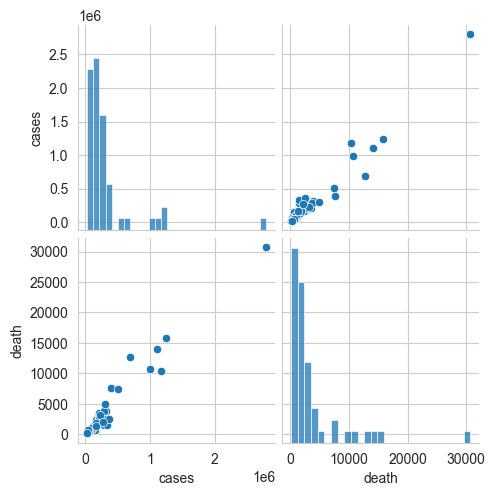

In [36]:
sns.pairplot(new_data)

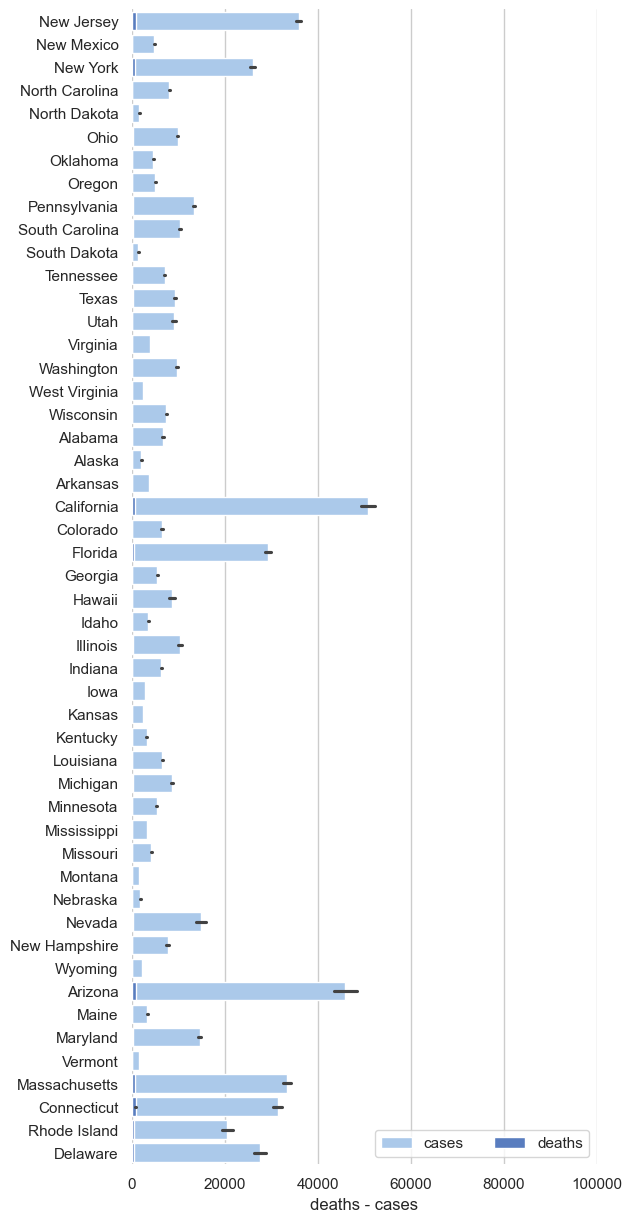

In [41]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(x="cases", y="state", data=data, label="cases", color="b")

sns.set_color_codes("muted")
sns.barplot(x="death", y="state", data=data, label="deaths", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100000), ylabel="", xlabel="deaths - cases")
sns.despine(left=True, bottom=True)

In [3]:
data.head()

,date,state,abbr,location,cases,death,season
id,,,,,,,
NJ0004673,2020-05-19,New Jersey,NJ,Burlington,4005,247,spring1
NJ0004674,2020-05-19,New Jersey,NJ,Union,15051,977,spring1
NM0004675,2020-05-19,New Mexico,NM,Luna,8,1,spring1
NY0004676,2020-05-19,New York,NY,Albany,1655,69,spring1
NY0004677,2020-05-19,New York,NY,Oswego,89,3,spring1


### Heatmap of Max Cases and Death by State and date-month

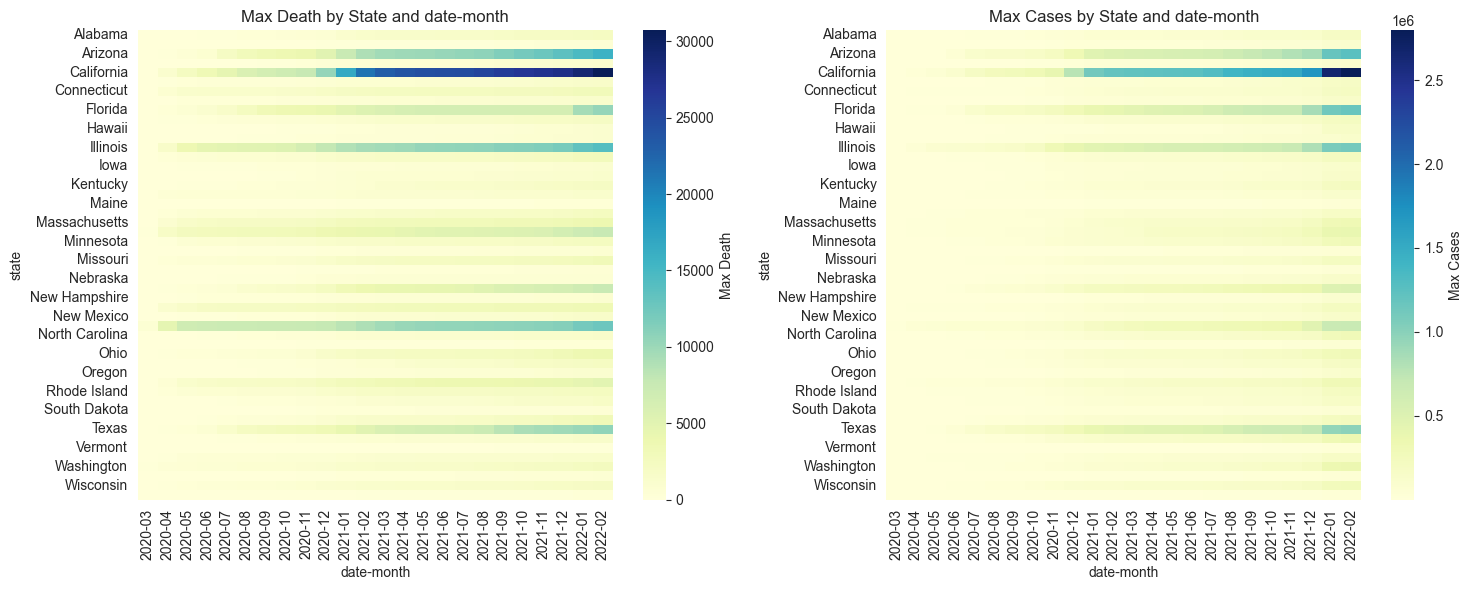

In [28]:
# Convert the "cases" and "death" columns to numeric data type
data["cases"] = pd.to_numeric(data["cases"], errors="coerce")
data["death"] = pd.to_numeric(data["death"], errors="coerce")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Max Death by State and date-month
max_death = data.groupby(["state", "date-month"])["death"].max().reset_index()
heatmap_death_data = max_death.pivot_table(
    index="state", columns="date-month", values="death", aggfunc="max"
)
sns.heatmap(
    heatmap_death_data,
    fmt="d",
    cmap="YlGnBu",
    cbar_kws={"label": "Max Death"},
    ax=axes[0],
)
axes[0].set_title("Max Death by State and date-month")

# Plot Max Cases by State and date-month
max_cases = data.groupby(["state", "date-month"])["cases"].max().reset_index()
heatmap_cases_data = max_cases.pivot_table(
    index="state", columns="date-month", values="cases", aggfunc="max"
)
sns.heatmap(
    heatmap_cases_data,
    fmt="d",
    cmap="YlGnBu",
    cbar_kws={"label": "Max Cases"},
    ax=axes[1],
)
axes[1].set_title("Max Cases by State and date-month")

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

***Too small to see, so we will create a heatmap for each***

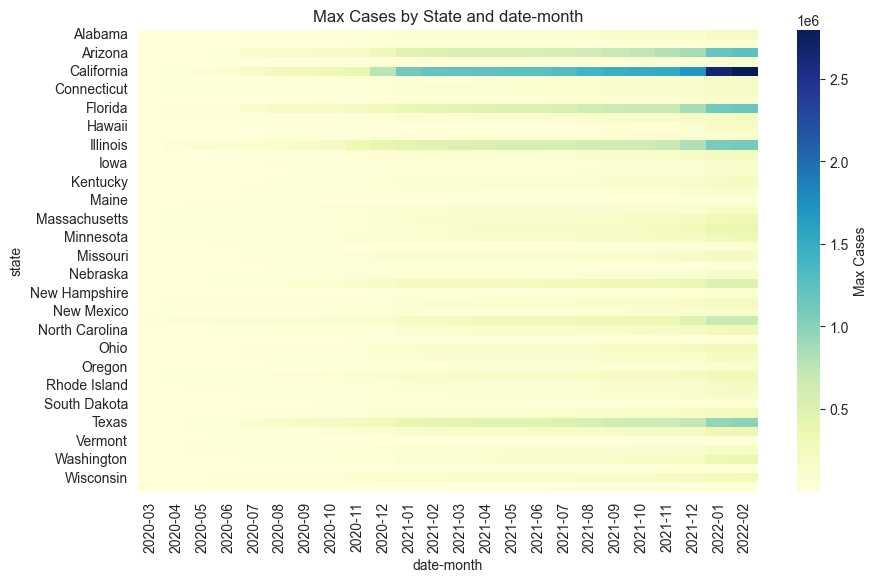

In [26]:
max_cases = data.groupby(["state", "date-month"])["cases"].max().reset_index()

# Pivot the data to create a heatmap
heatmap_data = max_cases.pivot_table(
    index="state", columns="date-month", values="cases", aggfunc="max"
)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, fmt="d", cmap="YlGnBu", cbar_kws={"label": "Max Cases"})
plt.title("Max Cases by State and date-month")
plt.show()

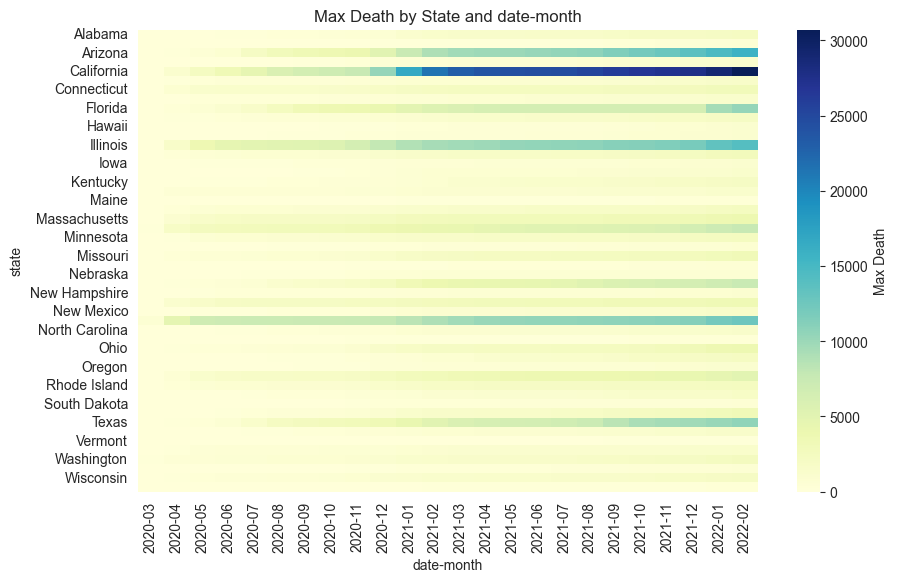

In [27]:
data["death"] = pd.to_numeric(data["death"], errors="coerce")
max_cases = data.groupby(["state", "date-month"])["death"].max().reset_index()

# Pivot the data to create a heatmap
heatmap_data = max_cases.pivot_table(
    index="state", columns="date-month", values="death", aggfunc="max"
)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, fmt="d", cmap="YlGnBu", cbar_kws={"label": "Max Death"})
plt.title("Max Death by State and date-month")
plt.show()